# A Jupyter notebook for linear regression using scikit-learn
### Author: Mattias Villani, Department of Statistics, Stockholm University, http://mattiasvillani.com

## The linear regression model
The linear regression model for the <em>i</em>th data point is of the form
$$y_i = \mathbf{x}_i^\top \mathbf{w} + \varepsilon_i,$$
where the $\varepsilon_i$ are model errors which are assumed to have the same variance $\sigma^2$. The $p$-dimensional feature vector $\mathbf{x}_i$ contains the $p$ features for observation/example $i$.

We can stack all $y_i$ observations in a target/response column vector of length $n$, $\mathbf{y}=(y_1,\ldots,y_n)\top$, and all the feature observations $\mathbf{x}_i$ as rows in a $n\times p$ feature matrix $\mathbf{X} = (\mathbf{x}_1,...\mathbf{x}_n)^\top$

For this tutorial we will assume a quadratic fitting function of the form
$$\sum_{i=1}^n(y_i-\mathbf{x}_i^\top \mathbf{w})^2$$
for which we know that that the least squares estimator is optimal:
$$ \hat{\mathbf{w}} = \big(\mathbf{X}^\top\mathbf{X}\big)^{-1}\mathbf{X}^\top\mathbf{y} $$


## The Boston housing data

Next, let's load the famous Boston housing dataset containing house prices in the Boston area. This particular dataset is included in <tt>sklearn</tt> (scikit-learn):

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

Note that boston is so called bunch object, a container for dataset which is essentially a Python dictionary (a data structure built up from keys and values). As for any Python dictionary, we can have a look at its keys. This shows that boston contains the features (<tt>data</tt>), the response/output variable (<tt>target</tt>), the names of the features (<tt>feature_names</tt>) and a description of the data:

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Here is the description of the dataset:

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's have a look at the features in the data slot of boston:

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

It is a good idea to print the dimension of the data, to know what we are dealing with:

In [5]:
print(boston.data.shape)

(506, 13)


The dataset therefore contains 506 observations on the following 13 features:

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


You should always plot the data to get to know it. Let's do a scatterplot of the median house price agains the feature LSTAT (proportion of low status population).  
I will use the module <tt>matplotlib</tt> (general library for plotting) and <tt>seaborn</tt> (plotting for data analysis).  
To facilitate plotting with seaborn, we will convert the data into a new data structure called <b>Pandas data frame</b>. A data frame is again a matrix of the data, but with possibility to add column and row names. 
Pandas data frame are also highly optimized for large data, and there are specific pandas function for read large data files etc. Pandas data frames should be part of your machine learning toolkit.

In [7]:
import pandas as pd
import numpy as np
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target

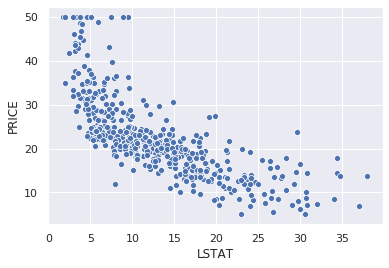

In [8]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x='LSTAT', y='PRICE', data=boston_df)

There is a clear negative relationship between the price of a house in an area and the proportion of low status population in that area.  
The relationship does seem linear however and it common to use <tt>log(price)</tt> as the response variable, but we will for simplicity in presentation continue on the original scale.

<tt>Seaborn</tt> is nice since we can easily do fancy plots for data analysis. We can use colors to add an additional variable to the plot.

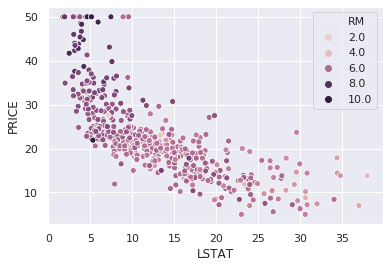

In [9]:
ax = sns.scatterplot(x='LSTAT', y='PRICE', hue = 'RM', data=boston_df)

Houses with more rooms are more expensive, but such houses also tend to be located in areas with low percentage of low status population.

## Fitting a linear regression in scikit-learn
Linear regression can be analyzed using Python via the ML library <tt>scikit-learn</tt>, abbreviated as <tt>sklearn</tt> which is included in the Python Anaconda Distribution. To use it, we import the <tt>linear_model</tt> module from <tt>sklearn</tt>:

In [10]:
from sklearn import linear_model

Now, let's set up an empty regression model object and have a look at its structure

In [11]:
regModel = linear_model.LinearRegression()
print(regModel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


We can now invoke the <tt>fit</tt> method of this model object. We need to find out how to pass the data as arguments to this methods. Let's use python's help function to find out:

In [12]:
help(regModel.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [13]:
regModel.fit(X = boston.data, y = boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Although it seems like nothing happended, the fit method has actually populated the <tt>regModel</tt> object with estimates. Uncomment the following line to get some help on what attributes regModel contains:

In [14]:
#help(regModel)

As you can see from the help file, we can pull out the estimates, $\hat{\mathbf{w}}$ from the attribute <tt>.coef_</tt> (note the underscore):

In [15]:
regModel.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

## Prediction in linear regression

Let us now use this learned model for prediction. Consider first the predicted value for the last observation in the dataset. The last observation in the dataset has feature vector (remember, Python starts counting from zero):

In [16]:
lastObs = boston.data[505,]
print(lastObs)

[4.741e-02 0.000e+00 1.193e+01 0.000e+00 5.730e-01 6.030e+00 8.080e+01
 2.505e+00 1.000e+00 2.730e+02 2.100e+01 3.969e+02 7.880e+00]


We can now use the <tt>predict</tt> method of the <tt>regModel</tt> object to get the model's prediction for lastObs. Python is a little picky here, and wants the feature vector to be a row vector. The reason is that we can use the <tt>predict</tt> method to get predictions for many feature vectors in a single call by using a matrix as input. That is, <tt>predict</tt> can take a $n_{pred}\times p$ matrix as input where each row is a complete feature vector. So, we need to do some Python magic to convert the feature vector into a row vector, using the <tt>reshape</tt> method for numpy arrays. The first argument of <tt>reshape</tt> is the number of rows that you want the end result to have, and the second argument is the number of columns. Here is a common Python trick: if you use -1 for the number of rows or columns, Python figures out the this missing piece of information itself. So now you may be able to understand the following common Python (numpy) command:

In [17]:
lastObs = boston.data[505,:].reshape(1,-1)
lastObs

array([[4.741e-02, 0.000e+00, 1.193e+01, 0.000e+00, 5.730e-01, 6.030e+00,
        8.080e+01, 2.505e+00, 1.000e+00, 2.730e+02, 2.100e+01, 3.969e+02,
        7.880e+00]])

Now, let's get the prediction for this feature vector:

In [18]:
regModel.predict(lastObs)

array([22.34421229])

So the prediction for this specific area (observation) is a median price of 22.34 thousand US dollars.

As a last exercise, suppose we want to use the fitted model to make predictions for this specific area, but under the assumption that LSTAT 
(last feature which measures the proportion of low status in the population) changes from 7.88\% (the number in the data) to 20\%.
Let's first change the last element (indicated by -1 in Python) of the feature vector to 50. Note that Python thinks of lastObs as a matrix with one row, so we need to be explicit about changing first row, last element:

In [19]:
lastObs[0,-1] = 20
lastObs

array([[4.741e-02, 0.000e+00, 1.193e+01, 0.000e+00, 5.730e-01, 6.030e+00,
        8.080e+01, 2.505e+00, 1.000e+00, 2.730e+02, 2.100e+01, 3.969e+02,
        2.000e+01]])

In [20]:
regModel.predict(lastObs)

array([15.98414075])

An increase in the low status population from 7.88 % to 20 % therefore reduces the predicted price from 22.34 to 15.98 thousand USD.